In [2]:
# importing the all required packages for the task
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# loading the data set into jupyter notebbok ( as i am working on linux i have encode/decode problem so i am adding one parameter extra)
df = pd.read_csv("/home/venkat/Downloads/train_set.csv", encoding='latin-1')

In [4]:
# looking at into data
df

,label,text
0,85389000,pdscpm gb part of panel of chiller
1,85389000,nm p economical extended rot hand parts for c...
2,85389000,lv ma pd trip unit for cvs parts of circuit br...
3,85389000,lv na p trip unit for cvs switch parts of circ...
4,85389000,lv tmd pd trip unit for cvs parts of circuitbr...
...,...,...
23610,84713010,veav hp ids dsc gb iu for ddr g base nb pchp ...
23611,84713010,pgv inspiron portable computernotebook assyb...
23612,84713010,xfuc acj eguuqnfinnnnnues india rmn hstnnic n...
23613,84713010,nwg latitude portable computernotebook assyb...


In [5]:
# looking at into top 5 data points from data set
df.head()

,label,text
0,85389000,pdscpm gb part of panel of chiller
1,85389000,nm p economical extended rot hand parts for c...
2,85389000,lv ma pd trip unit for cvs parts of circuit br...
3,85389000,lv na p trip unit for cvs switch parts of circ...
4,85389000,lv tmd pd trip unit for cvs parts of circuitbr...


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(23615, 2)

In [8]:
# looking at unique lables/classes 
df.label.unique()

array([85389000, 85177090, 85369090, 39269099, 73181500, 85366990,
       85364900, 85238090, 87089900, 33041000, 87082900, 84713010])

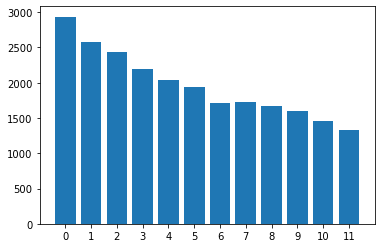

In [9]:
# looking at into the  data samples for idividual classes
classes = df.label.unique()
counts = []

for i in classes:
  count = len(df[df.label==i])
  counts.append(count)

plt.bar(['0', '1','2','3','4','5','6','7','8','9','10','11'], counts)
plt.show()

The data is imbalanced

In [10]:
# splliting the data for training and validation/test set

x = df.text.values
y = df.label.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [11]:
x.shape

(23615,)

In [12]:
y_train

array([85389000, 85369090, 87089900, ..., 39269099, 39269099, 73181500])

In [13]:
# creating vectorizer and transofrming our train and test data
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [14]:
X_train.shape

(18892, 12397)

In [15]:
y_train.shape

(18892,)

In [16]:
print(x_train[0], '\n', X_train[0])

bser pmk redundant processor unit 
   (0, 1361)	1
  (0, 7969)	1
  (0, 8206)	1
  (0, 8744)	1
  (0, 11326)	1


In [17]:
# by appling regular expressions removing unwanted  and getting most used or repeated words
import re

d = ",.!?/&-:;@'..."
"["+"\\".join(d)+"]"

# clean up the string
s = x_train[0]
s = ' '.join(w for w in re.split("["+"\\".join(d)+"]", s) if w)

for i in s.split():
  if len(i)>1: print(i, vectorizer.vocabulary_[i.lower()])

bser 1361
pmk 7969
redundant 8744
processor 8206
unit 11326


In [18]:
# creating model with n of iterations and fitting the model against our data set
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.9432564048274402


In [19]:
# printing confusion matrix againist our test set
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=df.label.unique())
df_cm = pd.DataFrame(cm, index=df.label.unique(), columns=df.label.unique())
df_cm

,85389000,85177090,85369090,39269099,73181500,85366990,85364900,85238090,87089900,33041000,87082900,84713010
85389000,582,2,8,15,0,2,0,0,1,0,0,0
85177090,7,498,0,8,0,0,0,0,1,0,0,0
85369090,13,3,440,5,0,23,6,0,3,0,0,0
39269099,14,6,2,405,5,1,0,0,7,1,7,0
73181500,2,1,0,13,402,0,0,0,6,0,0,0
85366990,8,0,18,2,1,354,1,0,0,0,0,0
85364900,3,0,3,0,1,0,326,0,0,0,0,0
85238090,0,0,1,0,0,0,0,333,0,0,0,0
87089900,9,0,1,14,2,1,0,0,306,0,8,0
33041000,0,0,0,0,0,0,0,0,0,296,0,0


In [20]:
# looking at into the percentag eof each class using cm
df_cm_percentage = df_cm.copy()
for i in df_cm_percentage:
  df_cm_percentage[i]/=df_cm_percentage[i].sum()

df_cm_percentage

,85389000,85177090,85369090,39269099,73181500,85366990,85364900,85238090,87089900,33041000,87082900,84713010
85389000,0.902326,0.003922,0.016913,0.032189,0.000000,0.005236,0.000000,0.0,0.002899,0.000000,0.000000,0.0
85177090,0.010853,0.976471,0.000000,0.017167,0.000000,0.000000,0.000000,0.0,0.002899,0.000000,0.000000,0.0
85369090,0.020155,0.005882,0.930233,0.010730,0.000000,0.060209,0.018018,0.0,0.008696,0.000000,0.000000,0.0
39269099,0.021705,0.011765,0.004228,0.869099,0.012165,0.002618,0.000000,0.0,0.020290,0.003367,0.026820,0.0
73181500,0.003101,0.001961,0.000000,0.027897,0.978102,0.000000,0.000000,0.0,0.017391,0.000000,0.000000,0.0
85366990,0.012403,0.000000,0.038055,0.004292,0.002433,0.926702,0.003003,0.0,0.000000,0.000000,0.000000,0.0
85364900,0.004651,0.000000,0.006342,0.000000,0.002433,0.000000,0.978979,0.0,0.000000,0.000000,0.000000,0.0
85238090,0.000000,0.000000,0.002114,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0
87089900,0.013953,0.000000,0.002114,0.030043,0.004866,0.002618,0.000000,0.0,0.886957,0.000000,0.030651,0.0
33041000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.996633,0.000000,0.0


In [21]:
# looking at into the percentag eof each class using cm
df_cm_percentage = df_cm.copy()
for i in df_cm_percentage:
  df_cm_percentage[i]/=df_cm_percentage[i].sum()

df_cm_percentage

,85389000,85177090,85369090,39269099,73181500,85366990,85364900,85238090,87089900,33041000,87082900,84713010
85389000,0.902326,0.003922,0.016913,0.032189,0.000000,0.005236,0.000000,0.0,0.002899,0.000000,0.000000,0.0
85177090,0.010853,0.976471,0.000000,0.017167,0.000000,0.000000,0.000000,0.0,0.002899,0.000000,0.000000,0.0
85369090,0.020155,0.005882,0.930233,0.010730,0.000000,0.060209,0.018018,0.0,0.008696,0.000000,0.000000,0.0
39269099,0.021705,0.011765,0.004228,0.869099,0.012165,0.002618,0.000000,0.0,0.020290,0.003367,0.026820,0.0
73181500,0.003101,0.001961,0.000000,0.027897,0.978102,0.000000,0.000000,0.0,0.017391,0.000000,0.000000,0.0
85366990,0.012403,0.000000,0.038055,0.004292,0.002433,0.926702,0.003003,0.0,0.000000,0.000000,0.000000,0.0
85364900,0.004651,0.000000,0.006342,0.000000,0.002433,0.000000,0.978979,0.0,0.000000,0.000000,0.000000,0.0
85238090,0.000000,0.000000,0.002114,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0
87089900,0.013953,0.000000,0.002114,0.030043,0.004866,0.002618,0.000000,0.0,0.886957,0.000000,0.030651,0.0
33041000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.996633,0.000000,0.0


# saving model

In [22]:
import pickle
filename = 'finalized_model.save'
pickle.dump(classifier, open(filename, 'wb'))

In [23]:
#  testi ng against new data [ test data set]

# loading test set

In [26]:
# loading test data set

test = pd.read_csv("/home/venkat/Downloads/test_set.csv", encoding='latin-1')

In [27]:
test_x = test.text.values
test_x

array(['lv tmd pd trip unit for nh parts of circuit breaker',
       'module tm analog outputs analog output expansion module for plc tmaq',
       ' command group t iii mechanismt p parts forcircuit breaker', ...,
       'eguujnnincnnnuas xuup acj note book computer laptop with accessories',
       'egubjnninnnnums wwup note book computer laptop with accessories',
       'lqav hp ids uma iu  g bnbpchp laptophstnnicbis nor'], dtype=object)

In [28]:
type(test_x)

numpy.ndarray

In [29]:
# creating vectorizer and transofrming our train and test data
#vectorizer = CountVectorizer()
#vectorizer.fit(test_x)

test_fn = vectorizer.transform(test_x)
#test = vectorizer.transform(test)
test_fn.shape

(5894, 12397)

In [30]:
test_fn

<5894x12397 sparse matrix of type '<class 'numpy.int64'>'
	with 42640 stored elements in Compressed Sparse Row format>

In [31]:
y_pred = classifier.predict(test_fn)
y_pred

array([85389000, 85389000, 85389000, ..., 84713010, 84713010, 84713010])

In [32]:
type(y_pred)

numpy.ndarray

In [33]:
type(test)

pandas.core.frame.DataFrame

In [34]:
test['predictions']=pd.DataFrame(y_pred, columns=['predictions'])

In [35]:
test

,text,predictions
0,lv tmd pd trip unit for nh parts of circuit br...,85389000
1,module tm analog outputs analog output expansi...,85389000
2,command group t iii mechanismt p parts forcir...,85389000
3,parts of relayelectrical contact issu e f xxup,85389000
4,parts for programmable logic controllers dm ...,85389000
...,...,...
5889,gdf latitude portable computernotebookassyba...,84713010
5890,cfjx precision portable computernotebook ass...,84713010
5891,eguujnnincnnnuas xuup acj note book computer l...,84713010
5892,egubjnninnnnums wwup note book computer laptop...,84713010


In [36]:
test.to_csv("Predictions.csv")

In [37]:
pwd

'/home/venkat'

In [38]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(test_fn)
result

array([85389000, 85389000, 85389000, ..., 84713010, 84713010, 84713010])